In [31]:
%pip install polars matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [32]:
%pip install ruptures

Note: you may need to restart the kernel to use updated packages.


In [33]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [34]:
papers_lf = pl.scan_parquet("sci_hub_papers.parquet")
downloads_lf = pl.scan_parquet("sci_hub_accesses.parquet")
metadata_lf = pl.scan_parquet("dois.parquet")
metadata_df = metadata_lf.collect()

In [35]:
metadata_lf.schema


/var/folders/dv/02z541lj1qj3zq1srgf0lvmh0000gn/T/ipykernel_76361/2816315317.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  metadata_lf.schema


Schema([('organization', String), ('doi_prefix', String)])

In [36]:
papers_lf.schema


/var/folders/dv/02z541lj1qj3zq1srgf0lvmh0000gn/T/ipykernel_76361/392692365.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  papers_lf.schema


Schema([('ID', Int64),
        ('DOI', String),
        ('Title', String),
        ('Author', String),
        ('Year', UInt16),
        ('Volume', UInt16),
        ('First_page', UInt16),
        ('Last_page', UInt16),
        ('Journal', String),
        ('ISBN', String),
        ('ISSNP', String),
        ('ISSNE', String),
        ('Filesize', Int64),
        ('TimeAdded', Datetime(time_unit='us', time_zone=None)),
        ('JOURNALID', String)])

In [37]:
downloads_lf.schema

/var/folders/dv/02z541lj1qj3zq1srgf0lvmh0000gn/T/ipykernel_76361/1116098702.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  downloads_lf.schema


Schema([('date', Datetime(time_unit='us', time_zone='Europe/Moscow')),
        ('doi', String),
        ('ip_id', String),
        ('user_id', String),
        ('country', String),
        ('city', String),
        ('lat', Float32),
        ('lon', Float32)])

/var/folders/dv/02z541lj1qj3zq1srgf0lvmh0000gn/T/ipykernel_76361/1219453030.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("download_count"))


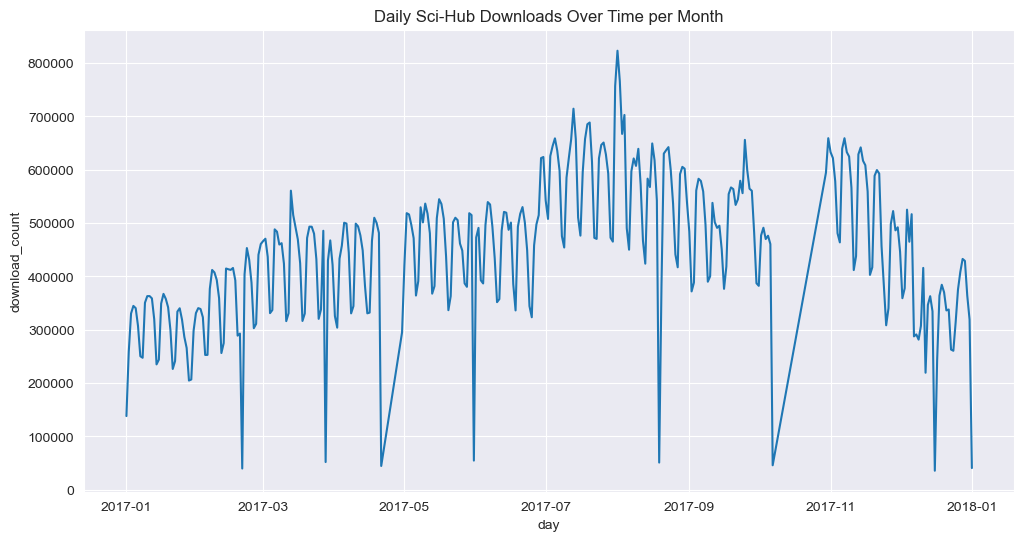

In [38]:
downloads_by_day = (
    downloads_lf
    .with_columns(pl.col("date").dt.truncate("1d").alias("day"))
    .group_by("day")
    .agg(pl.count().alias("download_count"))
    .sort("day")
    .collect()  # Only collect at the end
    .to_pandas()
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=downloads_by_day, x="day", y="download_count")
plt.title("Daily Sci-Hub Downloads Over Time per Month")
plt.show()

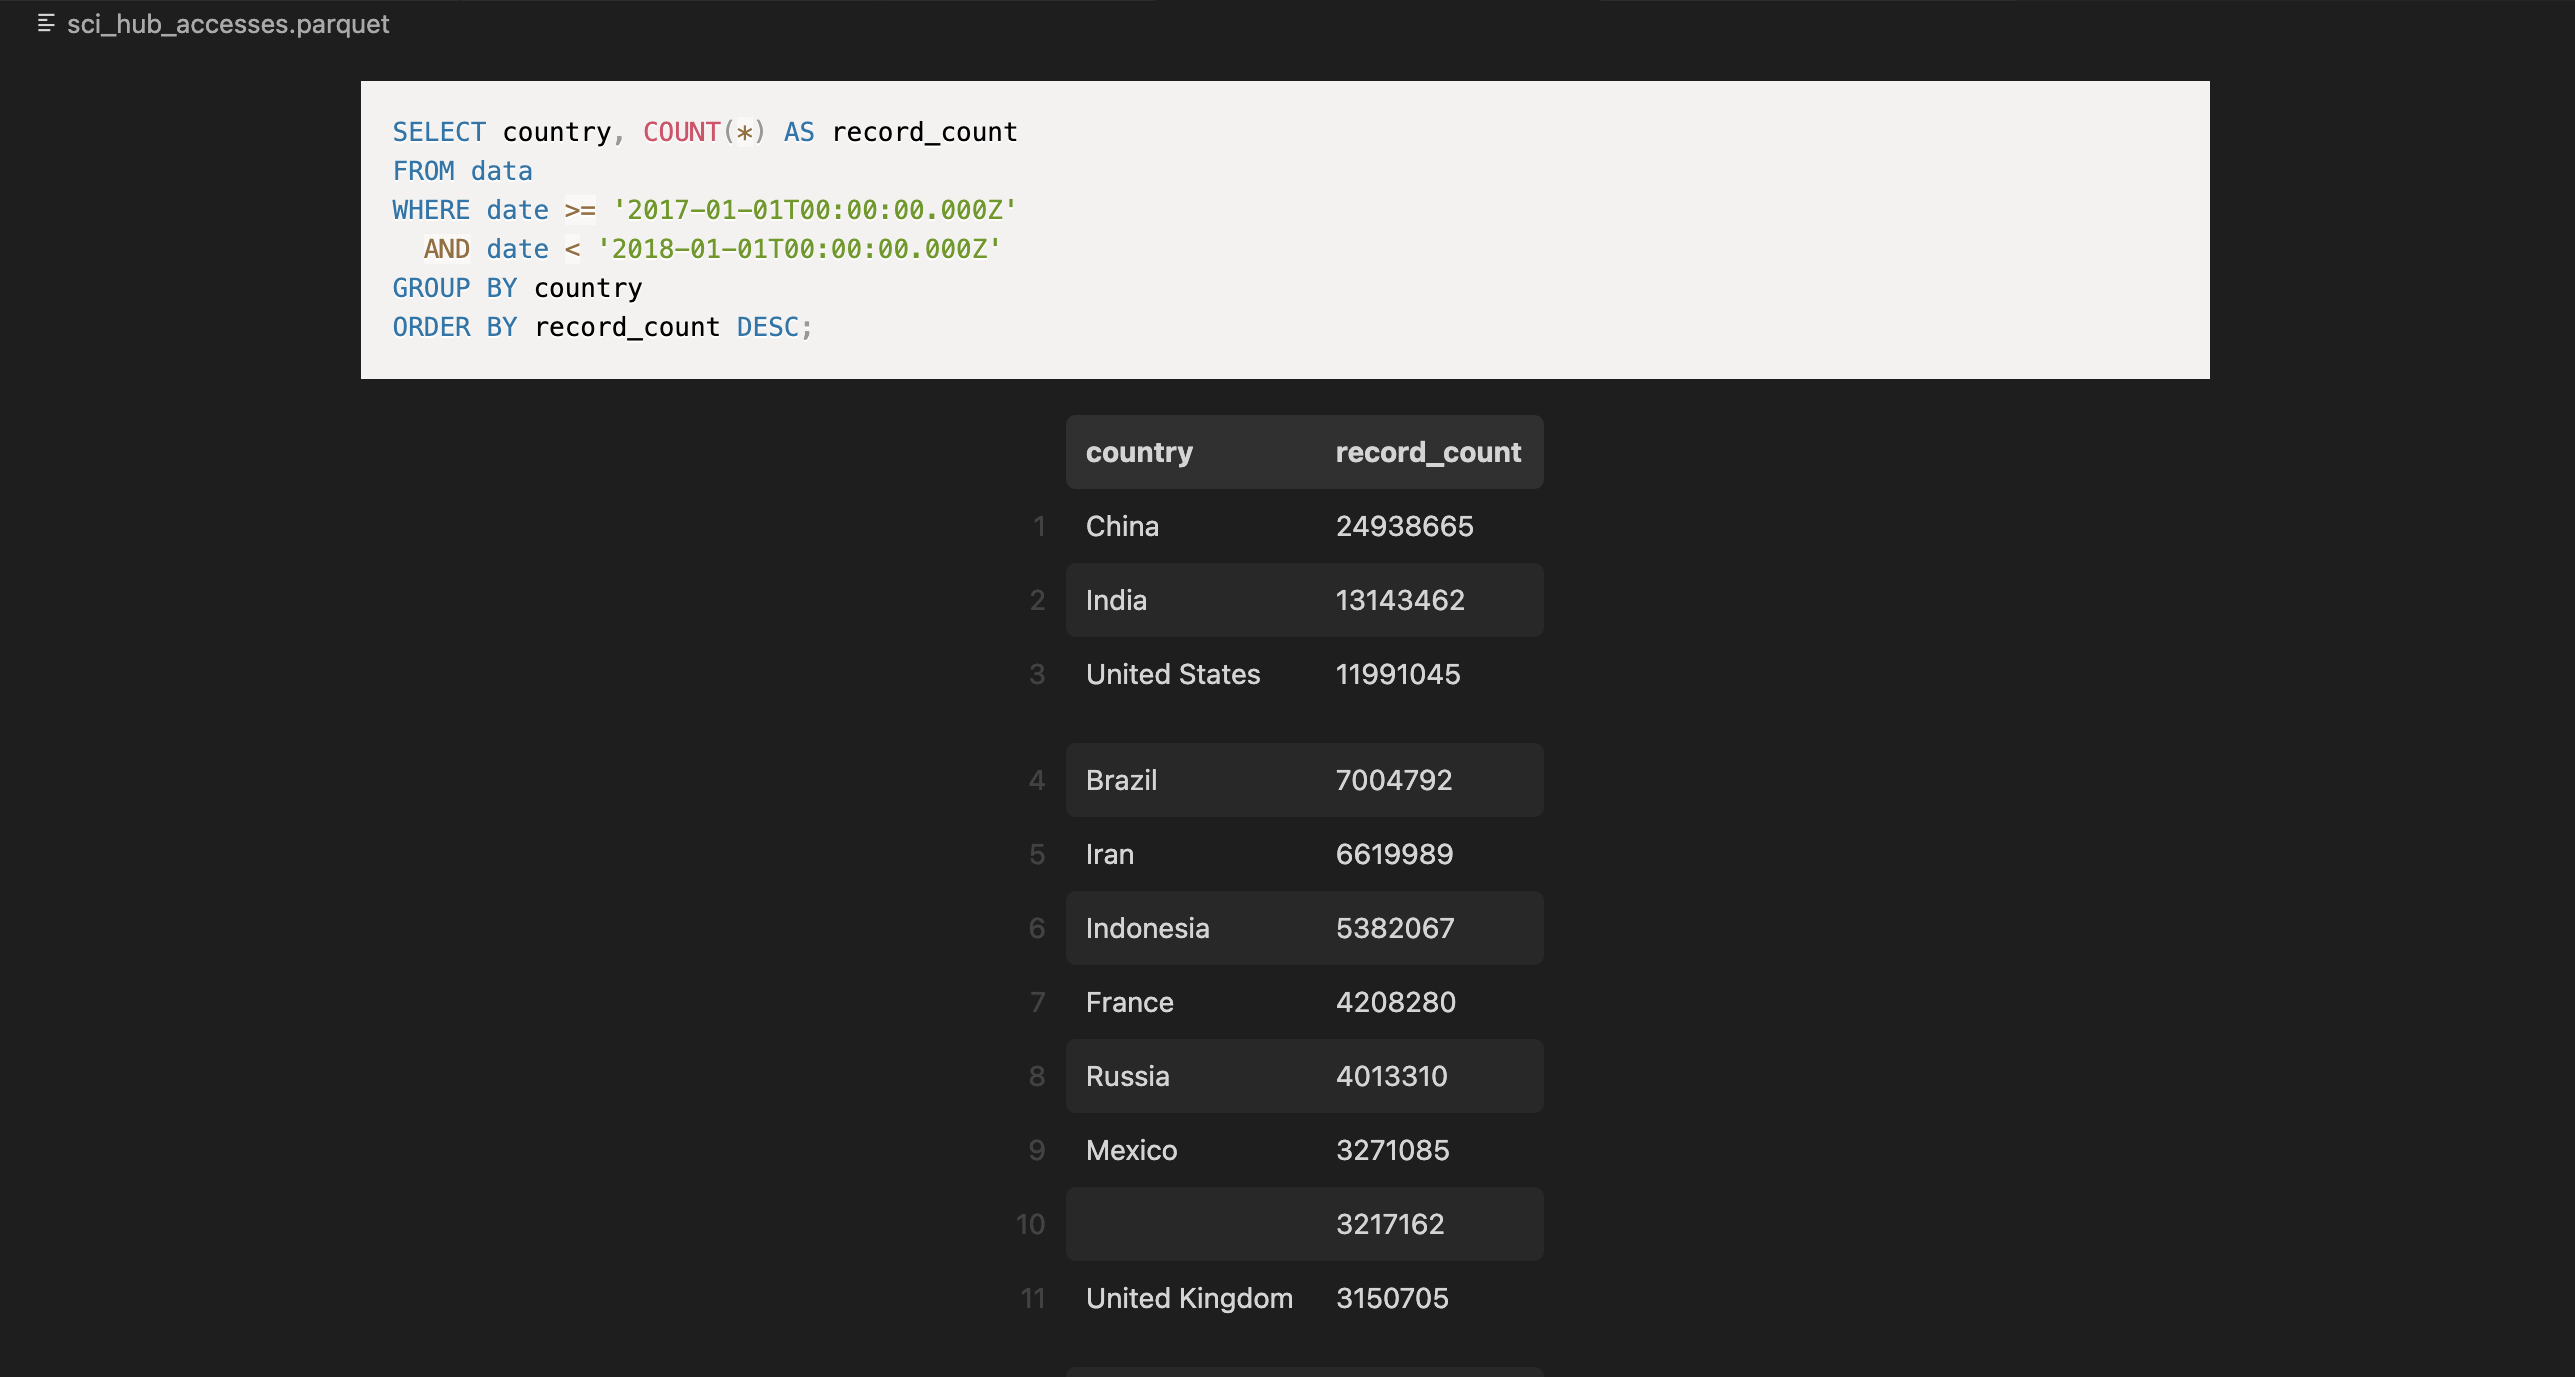

In [39]:
from IPython.display import Image
image_path = 'Accesses1.png'
Image(filename=image_path)

We can basically see in this table the Daily Sci-Hub downloads from the first month of 2017 to the first month of 2018. We can see that we had a peak number of downloads in around August of 2017. I found this interesting so I looked into why this might have been the case. There were a couple of reasons that I had found might have been linked to this: 
   
One interesting thing I found was how Sci-Hub usage is distributed across different countries through some SQL analysis. China is by far the biggest user, with about 25 million downloads, followed by India (13 million) and the U.S. (12 million). Other high-usage countries include Brazil, Iran, Indonesia, France, Russia, and Mexico.

What stood out to me was the gap between the U.S. and China. Both are major players in tech and research, but China relies on Sci-Hub way more. A reason is because many U.S. research papers are behind paywalls, and Chinese researchers might not have the same level of access. This could be tied to the ongoing tech race between the two countries. If China wants to stay competitive, it needs access to cutting-edge research, and Sci-Hub provides a way to get it.

So, while the August 2017 spike could be linked to academic cycles or specific events, it also highlights a bigger issue in terms of not everyone having equal access to scientific knowledge. Sci-Hub has essentially become a workaround for researchers in countries where access is limited, raising bigger questions about how we share and distribute knowledge globally.

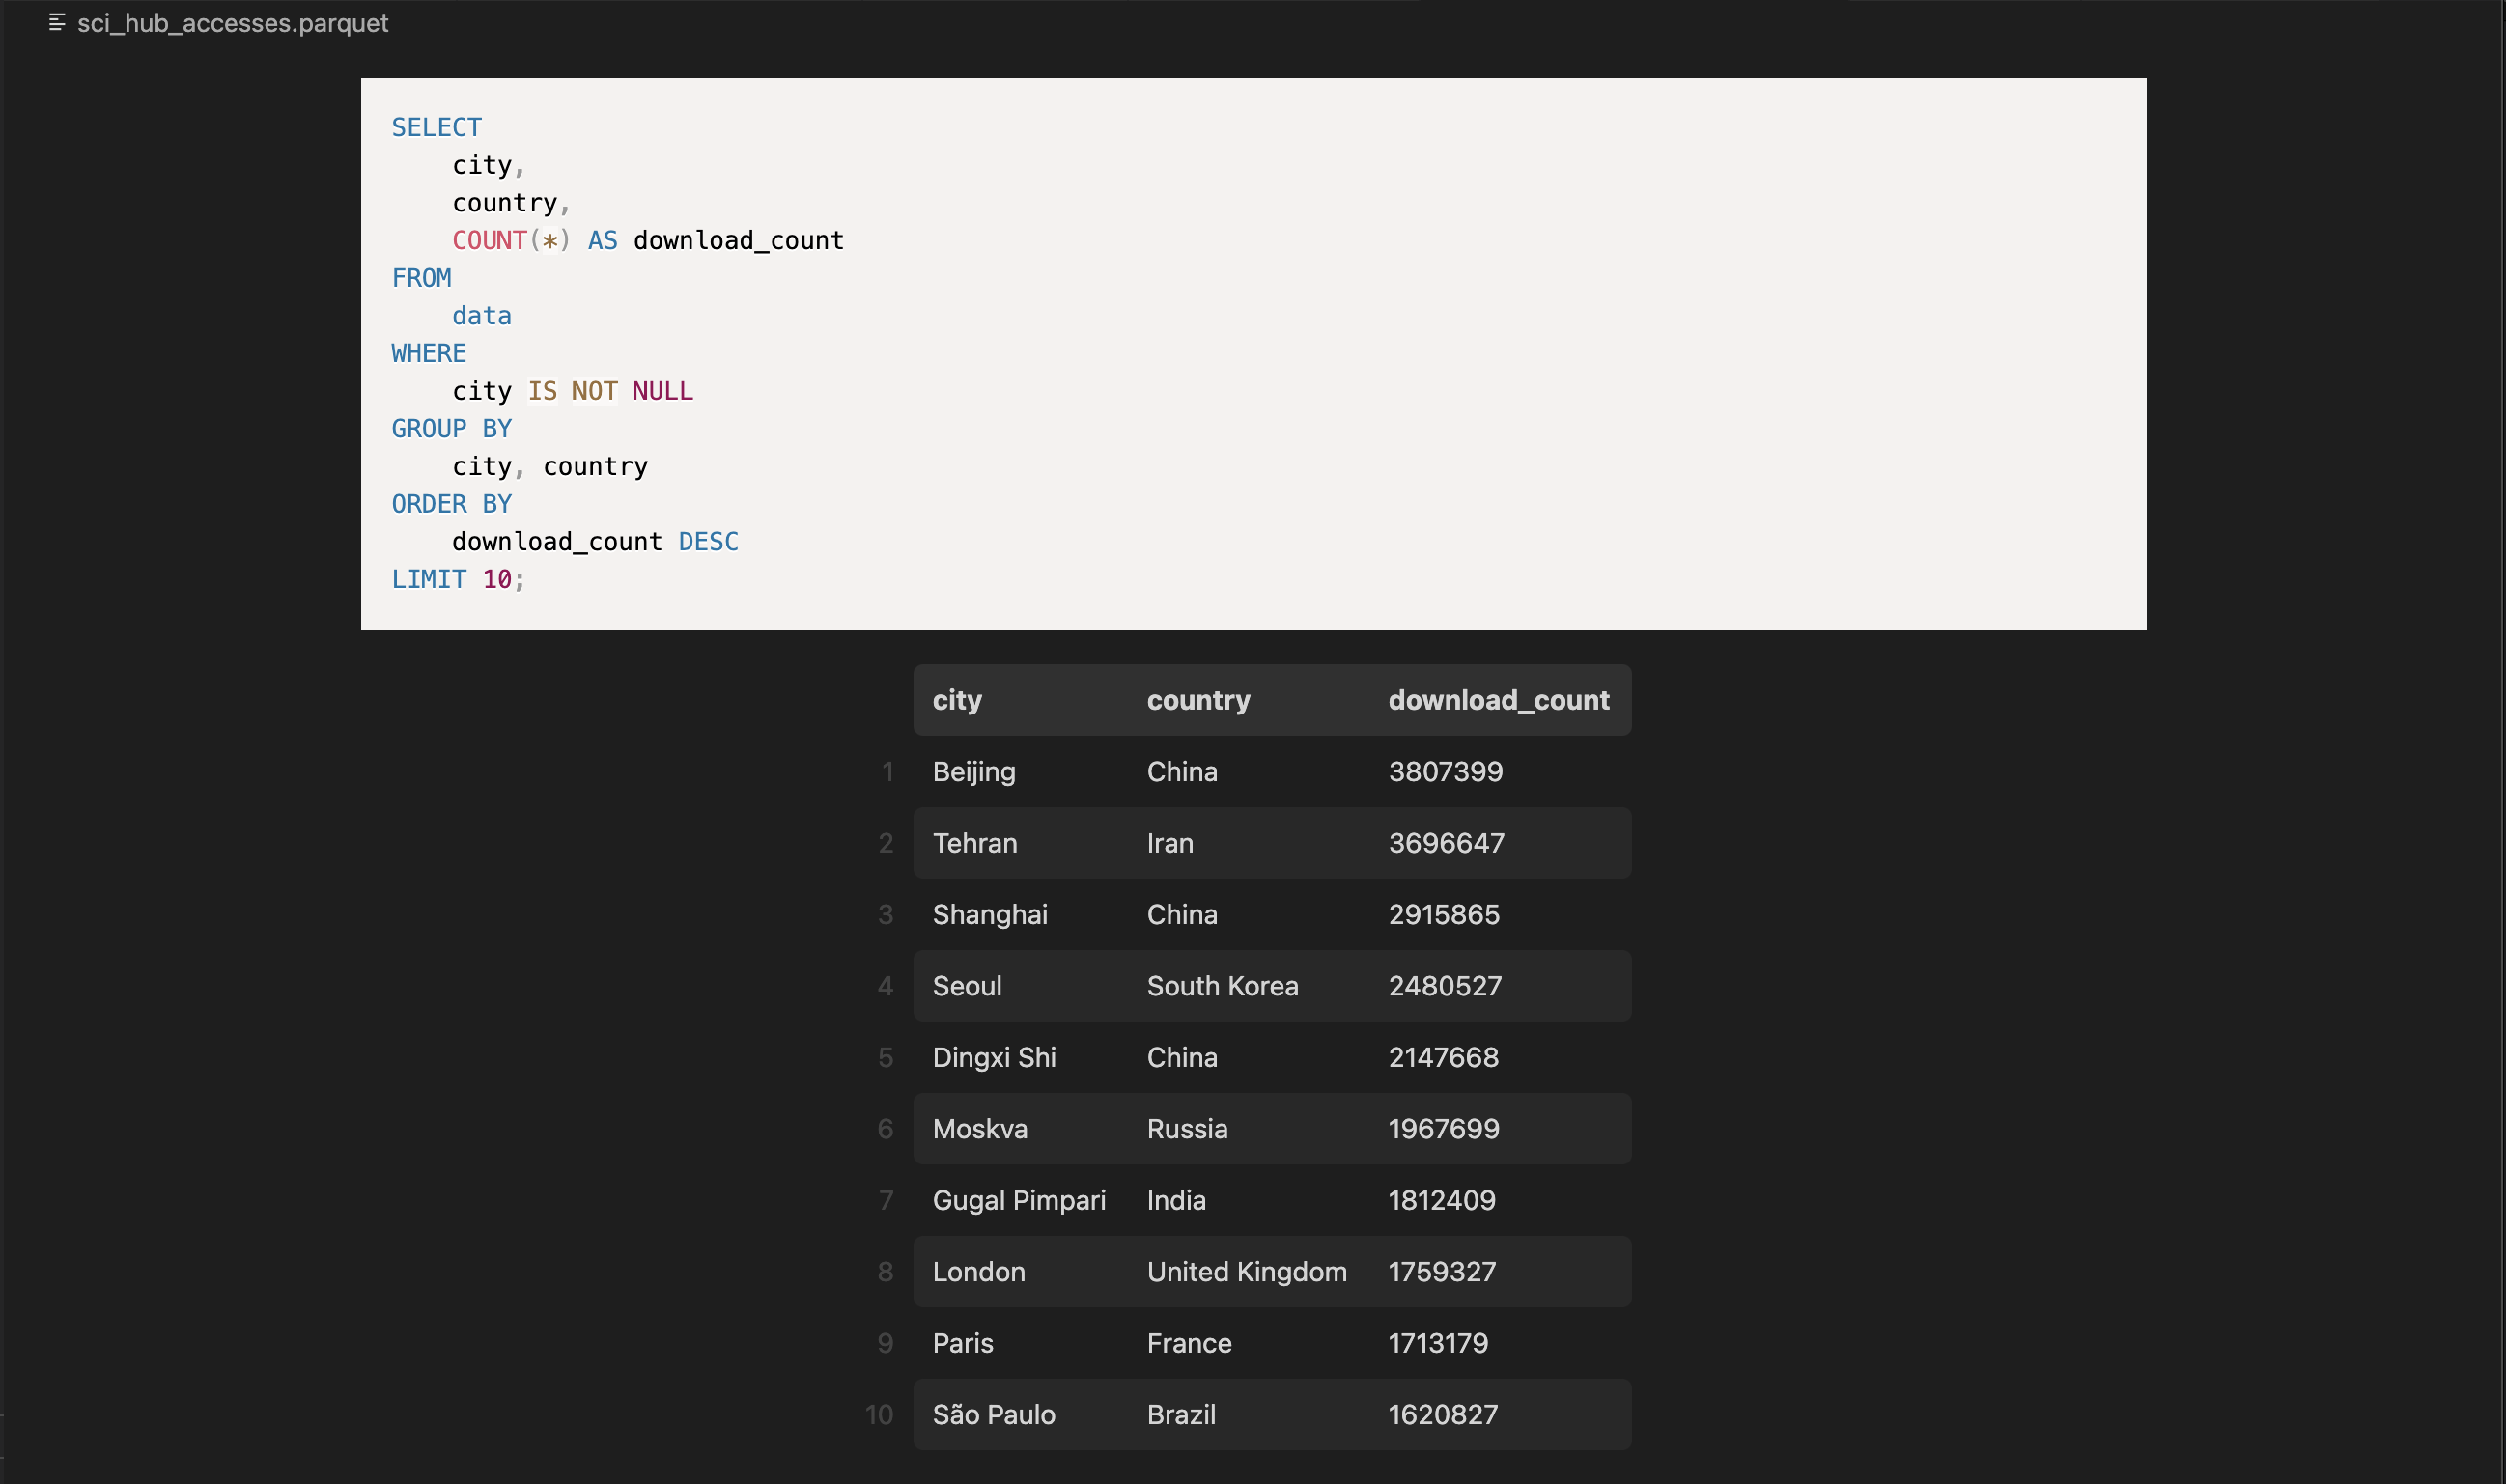

In [40]:
image_path = 'accesses2.png'
Image(filename=image_path)

If we look at the specific cities within the top 10 countries of download. We see a mix of high income countries, countries that have been blocked due to geopolitical sanctions, and emerging research hubs.

High Income Countries: 
London (UK), Paris (France), Seoul(South Korea)

Despite being high income nations with strong access to research, these cities still show significant download activiity emphasizing that despite being wealthy countries with strong research access, these cities still see a lot of downloads, showing that even top researchers don’t always have easy access to the papers they need. Paywalls, slow institutional access, and the sheer volume of research being done push people to look for quicker and convenient ways to get information.

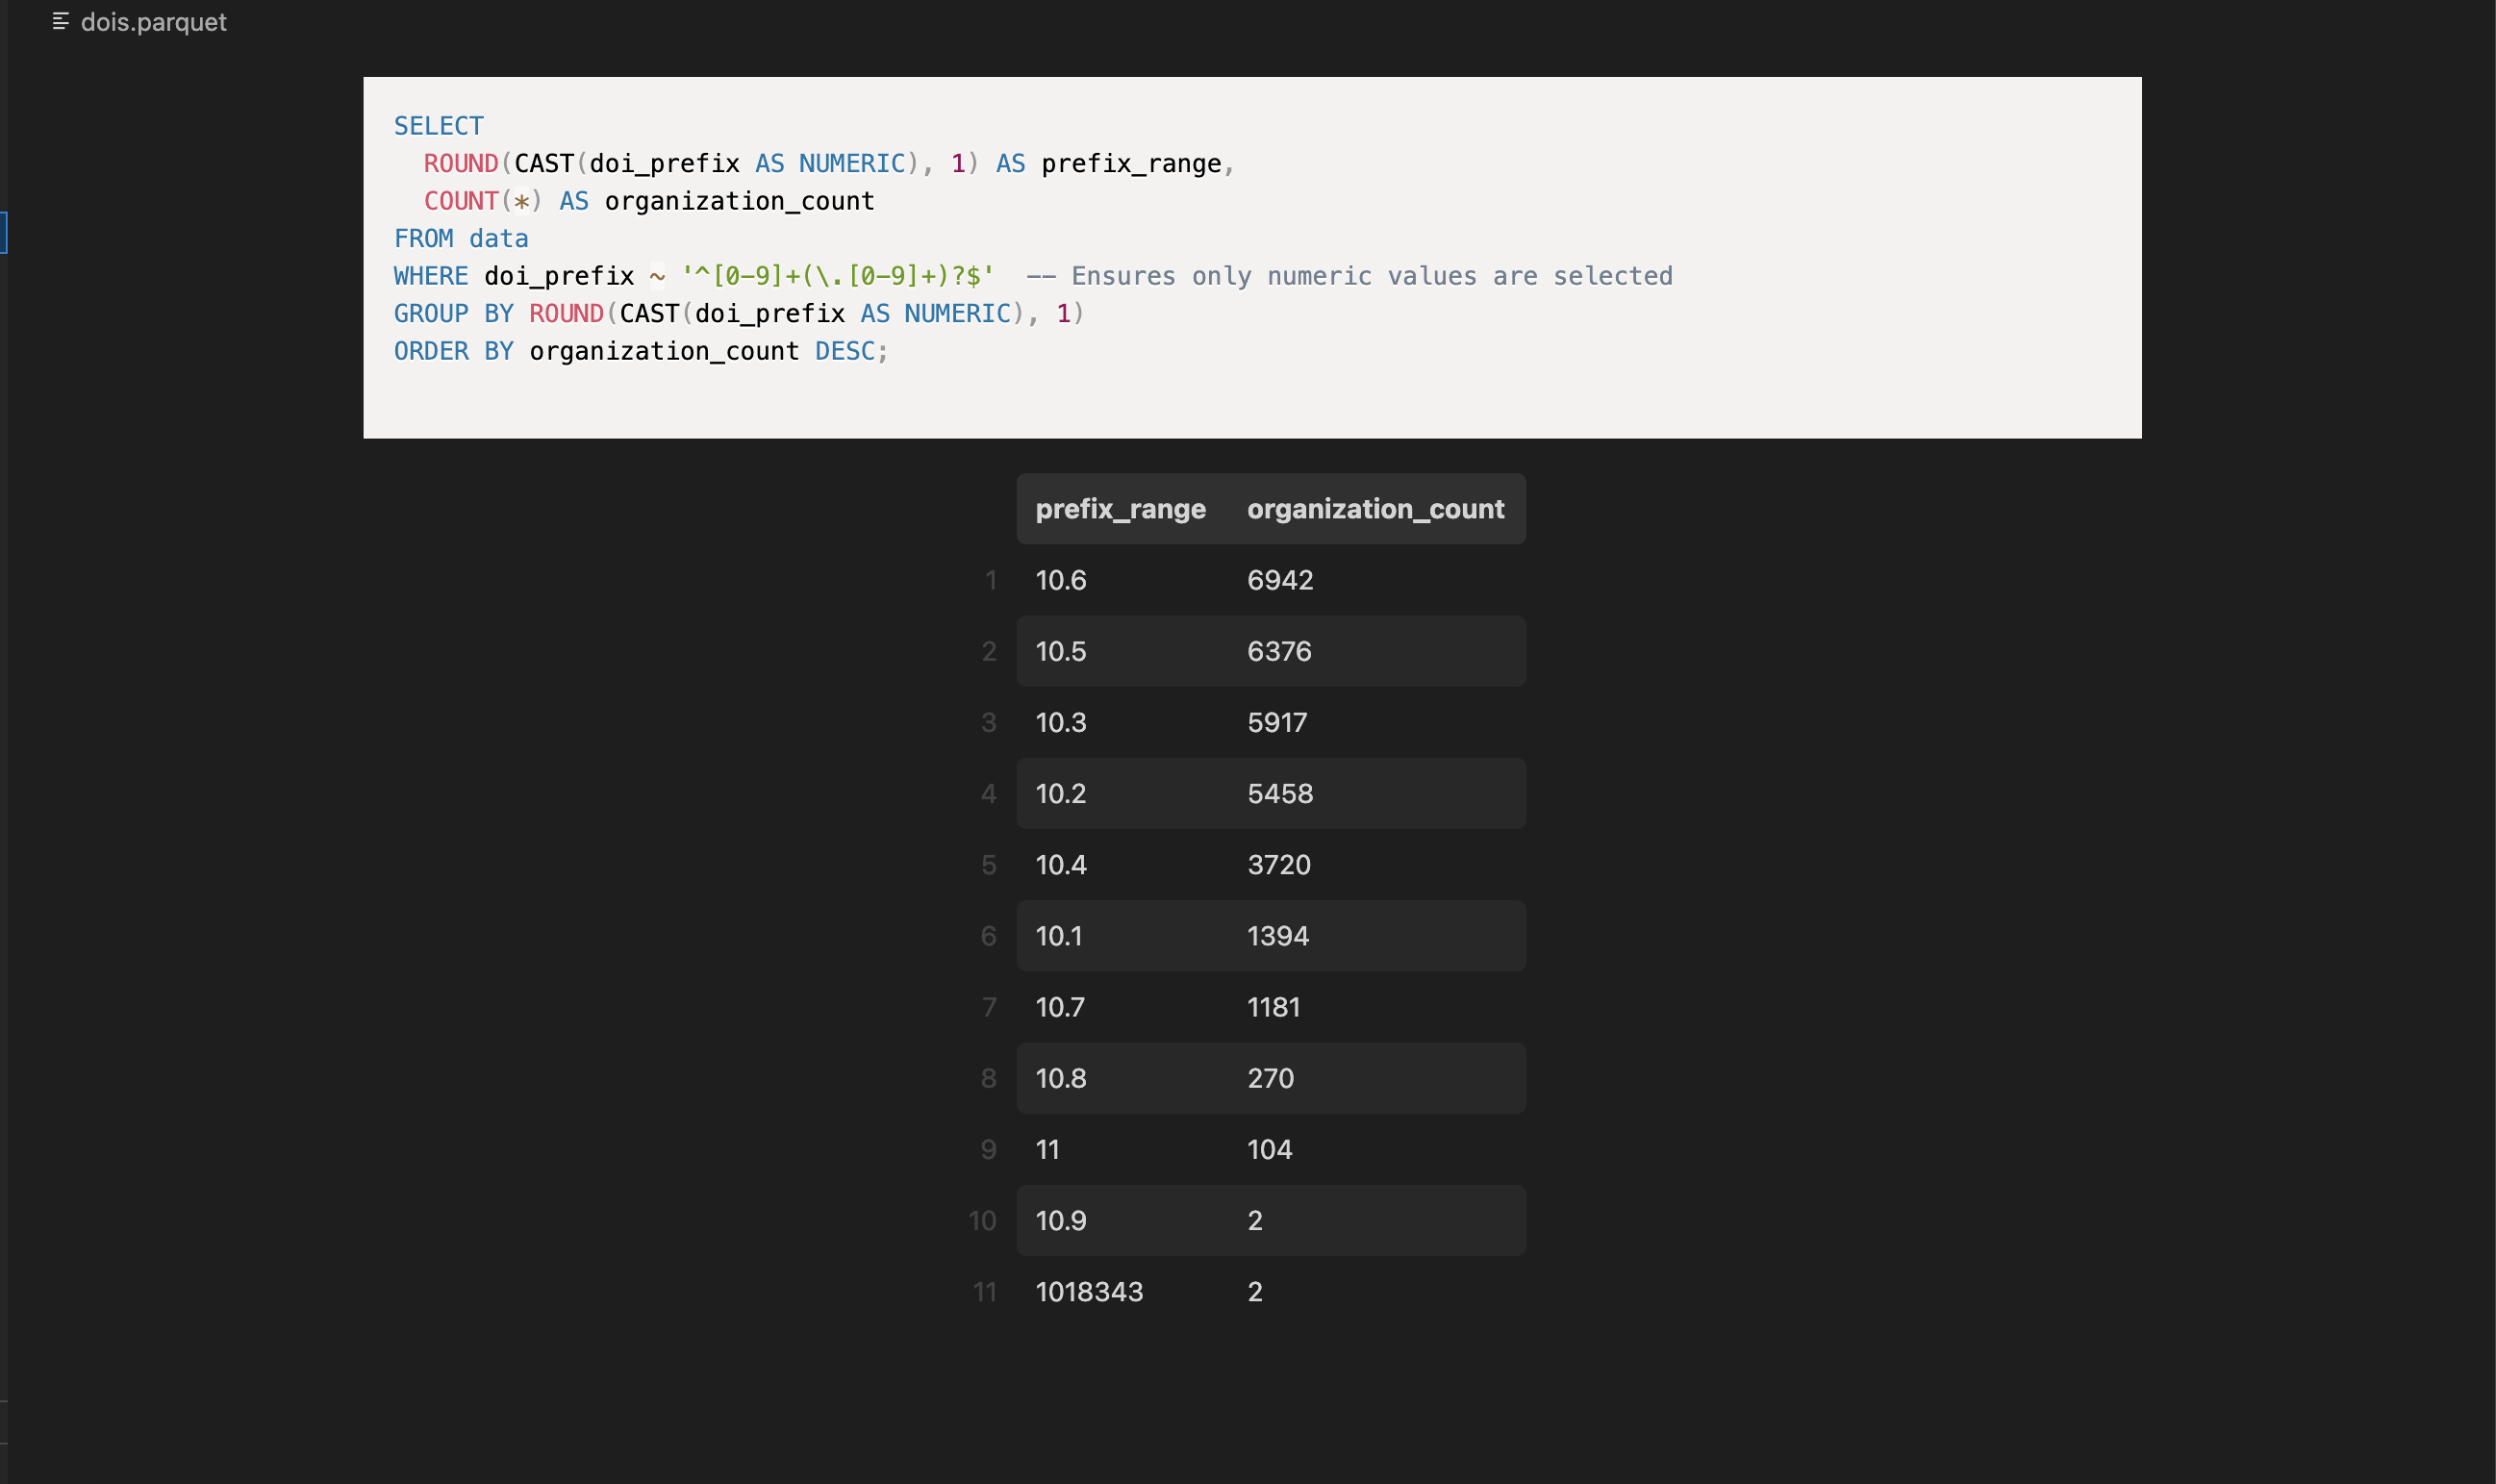

In [41]:
image_path = 'dois1.png'
Image(filename=image_path)

DOIs are digital object identifiers which are unique identifiers for academic papers. The number after the decimal place is usually what represents the publisher or organization that issued the DOI. So for example: 10.6 could corrrespond to Elsevier who is one of the largest academic publishers. And 10.5 could represent Springer Nature or Wiley. The organization count represents the number of downloads associated with each prefix range. The higher the count, the more frequently papers from that publisher are accessed through Sci-Hub.

WHY DOES ANY OF THIS MATTER?

Again this ties back into the paywall issue. The high download counts for major publishers such as Elsevier(10.6) and Springer(10.5) can demonstrate how frustrated researchers are who face these paywalls when trying to access critical research. Sci-Hub is able to fill this gap by giving free accesss. We can also see the role of smaller publishers on the site with smaller counts because they are probably less relevant to the broader research community or they are already providing open access to their content.

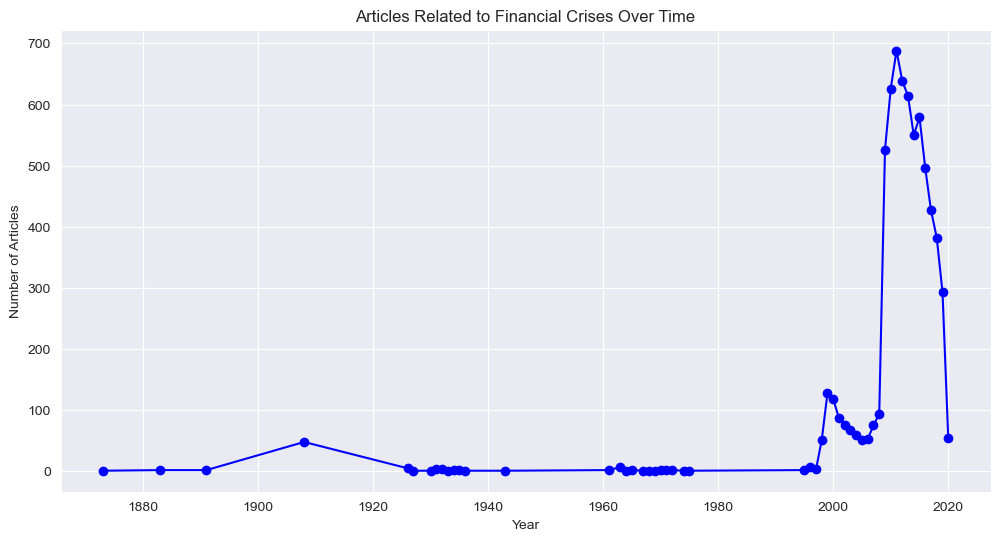

In [42]:
# Create a Polars DataFrame
data = pl.DataFrame({
    "Year": [2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
             2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
             2000, 1999, 1998, 1997, 1996, 1995, 1975, 1974, 1972, 1971,
             1970, 1969, 1968, 1967, 1965, 1964, 1963, 1961, 1943, 1936,
             1935, 1934, 1933, 1932, 1931, 1930, 1927, 1926, 1908, 1891,
             1883, 1873],
    "Article_Count": [54, 293, 382, 427, 496, 579, 550, 614, 639, 688,
                      626, 526, 94, 75, 53, 51, 60, 68, 75, 87,
                      118, 128, 51, 3, 7, 2, 1, 1, 2, 2,
                      2, 1, 1, 1, 2, 1, 7, 2, 1, 1,
                      2, 2, 1, 3, 4, 1, 1, 5, 48, 2,
                      2, 1]
})

data = data.sort("Year")

years = data["Year"].to_list()
article_counts = data["Article_Count"].to_list()

plt.figure(figsize=(12, 6))
plt.plot(years, article_counts, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Articles Related to Financial Crises Over Time')
plt.grid(True)
plt.show()


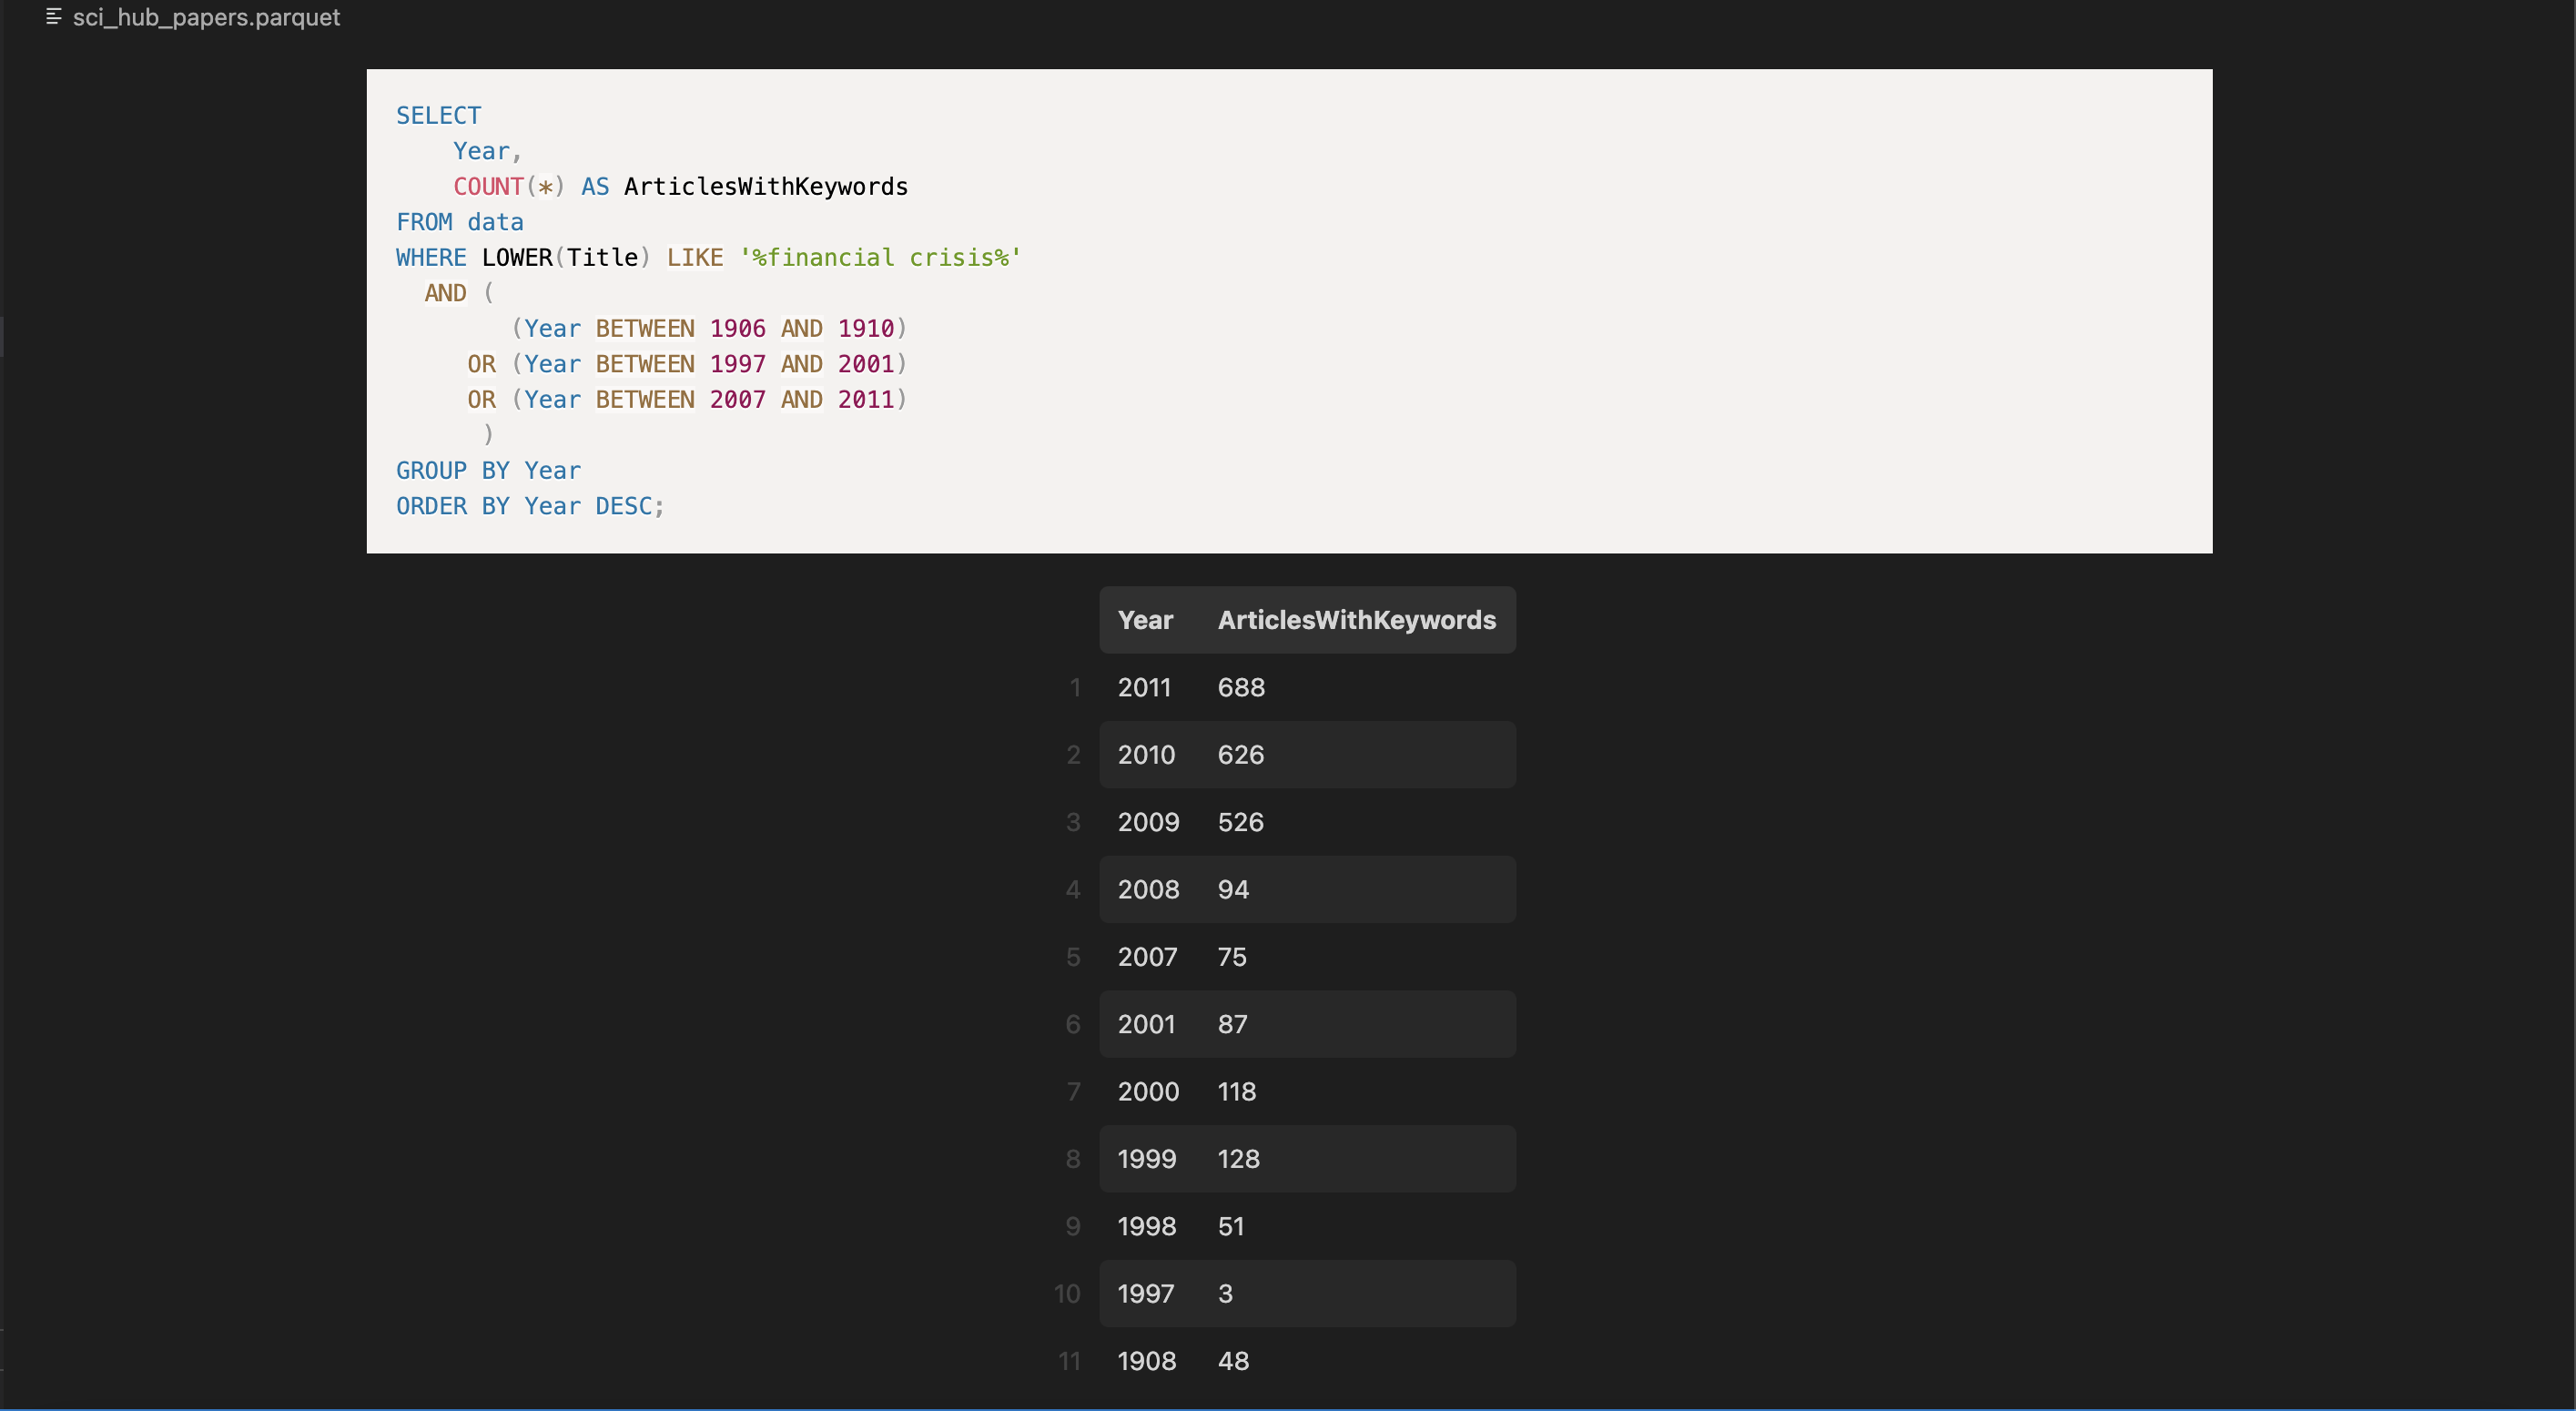

In [43]:
image_path = 'Papers 1.png'
Image(filename=image_path)

What I Found Interesting About Publication Trends on Financial Crises

When I looked at the graphs showing the years articles about the "financial crisis" were published, I noticed some clear spikes around major events. Three periods really jumped out to me: around 1908, 1999, and 2009. Each of these spikes seems to tell its own story.

1908:

I was least familiar with this crash so I looked into it. And I found that during 1907–1908, the U.S. experienced a severe recession following the Panic of 1907. Poor banking decisions, public distrust, and risky speculative investments led to a nearly 50% drop in the New York Stock Exchange, widespread bank failures, and a sharp decline in industrial output. The surge in articles that year likely showed the need for answers during the time, which eventually contributed to the creation of the Federal Reserve in 1913.

1999:

The spike around 1999 corresponds to the end of the dot com bubble. The era was marked by a lot of speculation and unsustainable market growth, sparking a lot of debate and analysis about the risks involved, which is reflected in the increased publication activity.

2009:

Finally, the 2009 peak aligns with the global financial crisis of 2008–2009. The collapse of major financial institutions and the housing market meltdown led to a worldwide recession, prompting a wave of articles aimed at dissecting the crisis and understanding how to prevent a similar disaster in the future.

What really ties these spikes together is that each one represents a moment when the world was forced to confront major economic challenges. The flurry of articles reflects a natural desire to understand, learn from, and eventually reform the systems that led to these crises.